In [1]:
#Importando as bibliotecas.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Criando o dataframe.
df = pd.read_excel("/content/drive/MyDrive/Datasets/germany-used-cars-market.xlsx")

In [3]:
#Visualização das 5 primeiras linhas.
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,33000,Abarth,500,Gasolina,Manual,Usado,12990,140.0,2016
1,10,Abarth,500,Gasolina,Manual,Demonstração,19790,160.0,2019
2,10,Abarth,500,Gasolina,Manual,Demonstração,19790,160.0,2019
3,5,Abarth,500,Gasolina,Manual,Demonstração,24480,179.0,2020
4,5,Abarth,500,Gasolina,Manual,Demonstração,24480,179.0,2020


In [4]:
#Exibição de 5 linhas aleatórias.
df.sample(5)

,mileage,make,model,fuel,gear,offerType,price,hp,year
93,2000,Alfa,Romeo Stelvio,Gasolina,Automático,Demonstração,84380,510.0,2021
638,22835,Audi,A4,Diesel,Automático,Usado,33840,163.0,2020
5680,28800,Ford,Fiesta,Diesel,Manual,Usado,12790,86.0,2019
23940,10,Volkswagen,Touran,Diesel,Automático,Pré-registrado,37490,150.0,2021
1014,23695,Audi,A6,Diesel,Automático,Usado,43883,231.0,2018


In [5]:
#Mostra o nome das colunas.
df.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

In [6]:
#Renomear as colunas para português.
df = df.rename(columns={"mileage":"Quilometragem","make":"Fabricante", "model":"Modelo", 
                        "fuel":"Combustível", "gear":"Transmissão", "offerType":"Tipo Oferta",
                        "price":"Preço", "hp":"Potência", "year":"Ano"})

In [7]:
#Tipo de dados de cada coluna.
df.dtypes

Quilometragem      int64
Fabricante        object
Modelo            object
Combustível       object
Transmissão       object
Tipo Oferta       object
Preço              int64
Potência         float64
Ano                int64
dtype: object

In [8]:
#Mostra o nome das colunas renomeadas/traduzidas.
df.columns

Index(['Quilometragem', 'Fabricante', 'Modelo', 'Combustível', 'Transmissão',
       'Tipo Oferta', 'Preço', 'Potência', 'Ano'],
      dtype='object')

In [9]:
#Quantidade de linhas e colunas antes de otimizar.
df.shape

(25322, 9)

In [10]:
##Consultando linhas com valores faltantes.
df.isnull().sum()

Quilometragem     0
Fabricante        0
Modelo           65
Combustível       0
Transmissão      79
Tipo Oferta       0
Preço             0
Potência         10
Ano               0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
#Verificando se há dados inconsistentes.
df["Combustível"].value_counts()

Gasolina             15735
Diesel                7716
Elétrico/Gasolina      995
Elétrico               516
LPG                     63
CNG                     58
Elétrico/Diesel         43
Others                  33
-/- (Fuel)              10
Hidrogênio               1
Name: Combustível, dtype: int64

In [13]:
#Removendo dados inconsistentes.
df.drop(df[df.Combustível == "Others"].index, inplace=True)
df.drop(df[df.Combustível == "-/- (Fuel)"].index, inplace=True)
df.drop(df[df.Combustível == "Hidrogênio"].index, inplace=True)

In [14]:
df["Combustível"].value_counts()

Gasolina             15735
Diesel                7716
Elétrico/Gasolina      995
Elétrico               516
LPG                     63
CNG                     58
Elétrico/Diesel         43
Name: Combustível, dtype: int64

In [15]:
#Alterando o tipo de dado da coluna Preço e Potência.
df["Preço"] = df["Preço"].astype("float")
df["Potência"] = df["Potência"].astype("int")

In [16]:
df.isnull().sum()

Quilometragem    0
Fabricante       0
Modelo           0
Combustível      0
Transmissão      0
Tipo Oferta      0
Preço            0
Potência         0
Ano              0
dtype: int64

In [17]:
#Quantidade de linhas e colunas após otimizar.
df.shape

(25126, 9)

In [18]:
#Quantidade de veículos por fabricante.
df["Fabricante"].value_counts(ascending=False)

Volkswagen       3626
Ford             2624
Opel             2468
Audi             1724
Skoda            1680
Renault          1620
Mercedes-Benz    1206
BMW              1202
Hyundai          1057
SEAT             1031
Fiat              975
Toyota            693
Volvo             624
Peugeot           563
Kia               543
smart             446
Citroen           441
Mazda             419
Dacia             394
Nissan            301
Mitsubishi        228
Porsche           185
Suzuki            165
MINI              156
Land              138
Jeep              125
Jaguar             99
Alfa               66
Cupra              65
Honda              36
Abarth             34
Lexus              31
Aston              26
SsangYong          26
Lada               19
Subaru             17
Maserati           12
Dodge              12
DS                 12
Bentley            11
McLaren            10
Ferrari             8
Tesla               8
Name: Fabricante, dtype: int64

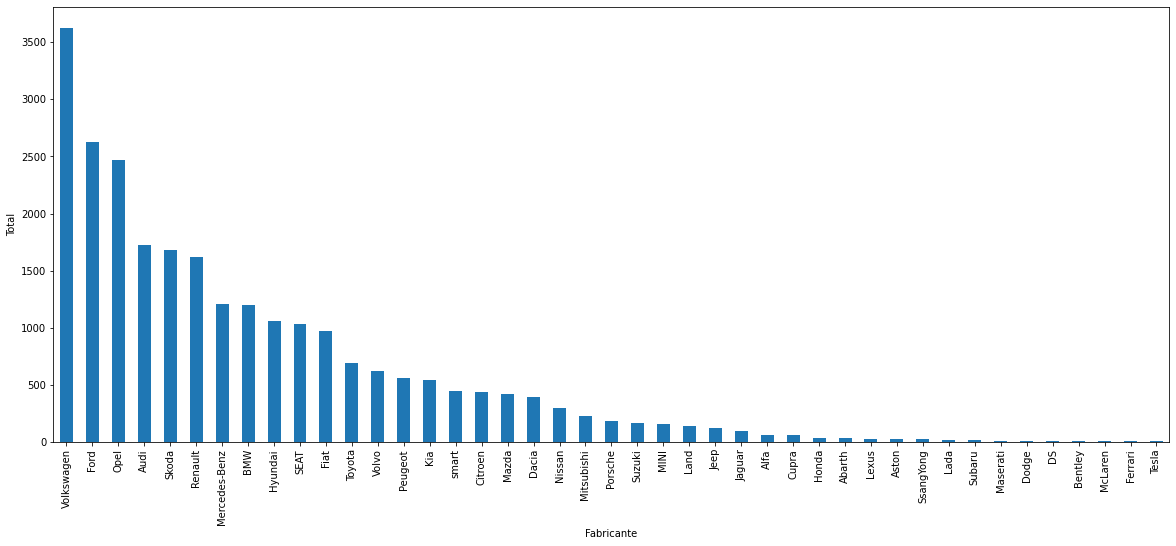

In [19]:
#Reprodução gráfica dos dados acima.
plt.figure(figsize=(20, 8))
df["Fabricante"].value_counts(ascending=False).plot.bar();
plt.xlabel("Fabricante");
plt.ylabel("Total");

In [20]:
#Quantidade de veículos por modelo exibindo os 20 maiores.
df["Modelo"].value_counts(ascending=False).head(20)

Corsa      799
Fiesta     781
Astra      642
Golf       631
up!        589
Focus      570
Fabia      559
500        482
Polo       431
Clio       423
Tiguan     402
Octavia    366
Leon       364
Aygo       336
Twingo     330
i10        327
forTwo     277
A4         276
Kuga       269
Ibiza      252
Name: Modelo, dtype: int64

In [21]:
#Exibindo por tipo de oferta.
df["Tipo Oferta"].value_counts()

Usado                 18924
Pré-registrado         2757
Demonstração           2316
Carro de Empregado     1116
Novo                     13
Name: Tipo Oferta, dtype: int64

In [22]:
#Quantidade por tipo de transmissão.
df["Transmissão"].value_counts()

Manual             14100
Automático         11017
Semi-Automático        9
Name: Transmissão, dtype: int64

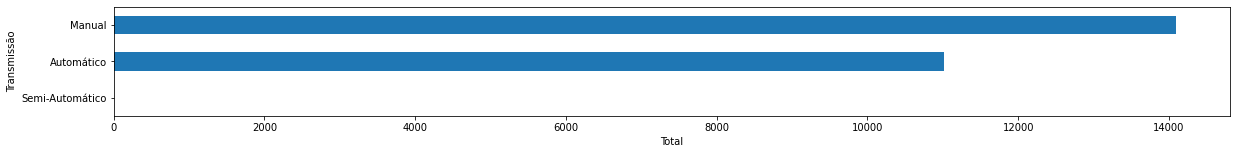

In [23]:
# Gráfico por tipo de transmissão.
plt.figure(figsize=(20, 2))
df["Transmissão"].value_counts(ascending=True).plot.barh();
plt.ylabel("Transmissão");
plt.xlabel("Total");

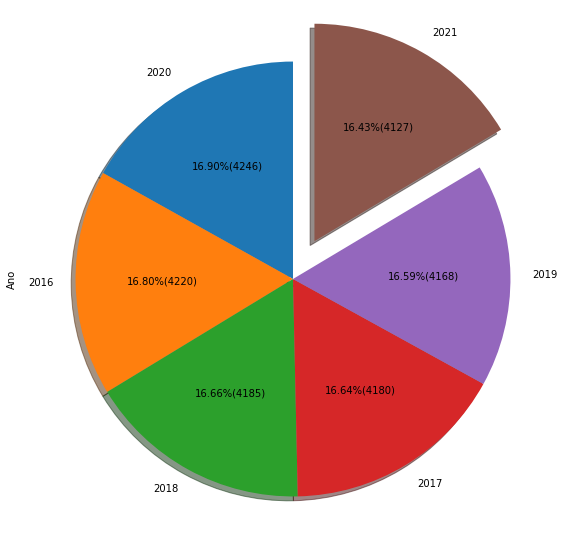

In [24]:
#Gráfico pizza com a quantidade e percentual de carros por ano. Destaque para o ano corrente. 
df["Ano"].value_counts().plot.pie(figsize=(10, 10), explode = (0, 0, 0, 0, 0, 0.2), shadow = True, startangle=90, 
                                  autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*df.groupby('Ano').size().sum()));

In [25]:
#Quantidade por tipo de combustível.
df["Combustível"].value_counts()

Gasolina             15735
Diesel                7716
Elétrico/Gasolina      995
Elétrico               516
LPG                     63
CNG                     58
Elétrico/Diesel         43
Name: Combustível, dtype: int64

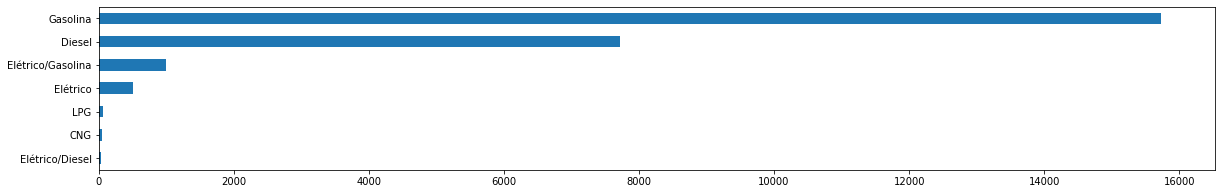

In [26]:
plt.figure(figsize=(20, 3))
df["Combustível"].value_counts().sort_values(ascending=True).plot.barh();

In [27]:
#Quantidade de modelo por fabricante.
df.groupby("Fabricante")["Modelo"].nunique().sort_values(ascending=False)

Fabricante
Mercedes-Benz    95
BMW              67
Volkswagen       43
Audi             37
Ford             27
MINI             25
Citroen          23
Renault          22
Opel             21
Fiat             18
Toyota           17
Kia              16
Nissan           14
Hyundai          14
Peugeot          14
Volvo            13
Lexus            12
Skoda            11
Porsche           9
SEAT              9
Mazda             8
Suzuki            8
Mitsubishi        7
Land              7
Jaguar            7
Honda             7
Dodge             6
Aston             6
Alfa              6
Abarth            6
Jeep              6
Dacia             5
Maserati          5
McLaren           5
SsangYong         5
Ferrari           4
Lada              4
DS                4
Subaru            4
Cupra             3
Bentley           3
Tesla             3
smart             2
Name: Modelo, dtype: int64

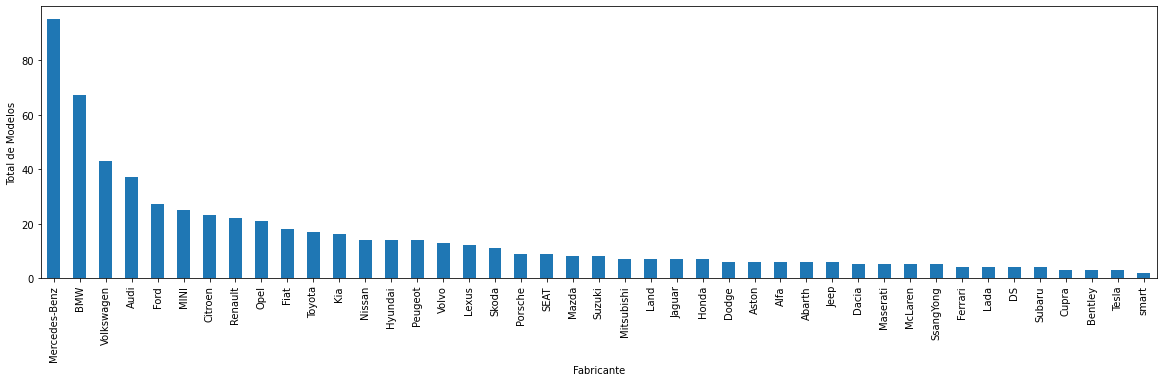

In [28]:
#Gráfico da quantidade de modelo por fabricante.
plt.figure(figsize=(20, 5))
df.groupby("Fabricante")["Modelo"].nunique().sort_values(ascending=False).plot.bar();
plt.xlabel("Fabricante")
plt.ylabel("Total de Modelos");

In [29]:
#Criação de dataframe customizado para as extrações seguintes.
df_custom = df.drop(columns = ["Quilometragem", "Combustível", "Transmissão", "Tipo Oferta", "Ano"])

In [30]:
#Amostra do dataframe customizado.
df_custom.sample(5)

,Fabricante,Modelo,Preço,Potência
14582,Peugeot,108,7999.0,69
3071,BMW,Z4,48500.0,258
5713,Ford,Fiesta,13486.0,86
14987,Peugeot,2008,14690.0,83
21622,Volkswagen,Golf,17290.0,125


In [31]:
#Os 5 veículos mais caros.
df_custom.nlargest(5, "Preço")

,Fabricante,Modelo,Preço,Potência
4005,Ferrari,F12,1199900.0,775
11236,Mercedes-Benz,S 650,717078.0,630
4004,Ferrari,812,439900.0,799
15135,Porsche,991,399911.0,700
104,Aston,Martin,398000.0,604


In [32]:
#Os 5 veículos mais baratos.
df_custom.nsmallest(5, "Preço").sort_values(by="Preço", ascending=False)

,Fabricante,Modelo,Preço,Potência
14510,Opel,Zafira Tourer,3299.0,131
14512,Opel,Zafira Tourer,3299.0,131
16753,Renault,Twizy,3250.0,12
3146,Citroen,C1,3000.0,69
16521,Renault,Twingo,2300.0,69


In [33]:
#Os 5 veículos mais potentes.
df_custom.nlargest(5, "Potência")

,Fabricante,Modelo,Preço,Potência
10975,Mercedes-Benz,G 63 AMG,216619.0,850
4004,Ferrari,812,439900.0,799
4005,Ferrari,F12,1199900.0,775
20339,Tesla,Model X,99999.0,772
7230,Ford,Mustang,121000.0,771
